#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#load dataset

In [3]:

data = pd.read_csv('zomato.csv')

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.shape

(51717, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#Checking null values

In [7]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#Deleting Unnnecessary Columns

In [8]:
df=data.drop(['url','phone'],axis=1)


In [9]:
df.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#check duplicate values

In [10]:
df.duplicated().sum()

43

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

#removing null values

In [13]:
# Replace missing values in numeric columns with the mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Replace missing values in categorical columns with the most frequent value or a specific value
categorical_cols = df.select_dtypes(exclude='number').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')  # Replace with 'Unknown' or df.mode() as needed

# Take a random sample of 50% of the DataFrame rows
sampled_df = df.sample(frac=0.5, random_state=1)


In [14]:
df.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [15]:
df.shape

(51674, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51674 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         51674 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51674 non-null  object
 7   rest_type                    51674 non-null  object
 8   dish_liked                   51674 non-null  object
 9   cuisines                     51674 non-null  object
 10  approx_cost(for two people)  51674 non-null  object
 11  reviews_list                 51674 non-null  object
 12  menu_item                    51674 non-null  object
 13  listed_in(type)              51674 n

#renaming columns

In [17]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [18]:
df.shape

(51674, 15)

In [19]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#unique values in cost column

In [20]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', 'Unknown', '1,400',
       '180', '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

#removing unused data

In [21]:
df = df.loc[df.cost !='UnKnown']

In [22]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', 'Unknown', '1,400',
       '180', '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

#convert the result to float

In [23]:
df['cost'] = pd.to_numeric(df['cost'].str.replace(',',''), errors='coerce').fillna(0).astype(float)

In [24]:
print(df['cost'].unique())

print('---'*10)


[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  900.  200.  750.
  150.  850.  100. 1200.  350.  250.  950. 1000. 1500. 1300.  199.   80.
 1100.  160. 1600.  230.  130.   50.  190. 1700.    0. 1400.  180. 1350.
 2200. 2000. 1800. 1900.  330. 2500. 2100. 3000. 2800. 3400.   40. 1250.
 3500. 4000. 2400. 2600.  120. 1450.  469.   70. 3200.   60.  560.  240.
  360. 6000. 1050. 2300. 4100. 5000. 3700. 1650. 2700. 4500.  140.]
------------------------------


#unique values in rating column

In [25]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', 'Unknown', '2.6/5', '3.8 /5',
       '3.4/5', '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5',
       '2.3/5', '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5',
       '4.0 /5', '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5',
       '2.8 /5', '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5',
       '4.5 /5', '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5',
       '4.6 /5', '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5',
       '2.4 /5', '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#removing unnecesary data

In [26]:
df.shape

(51674, 15)

In [27]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [28]:
df = df.loc[df.rate !='NEW']

In [29]:
df = df.loc[df.rate !='Unknown']

#removing /5 

In [30]:
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

In [31]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

#visualisations

#Restaurants delivering Online or not

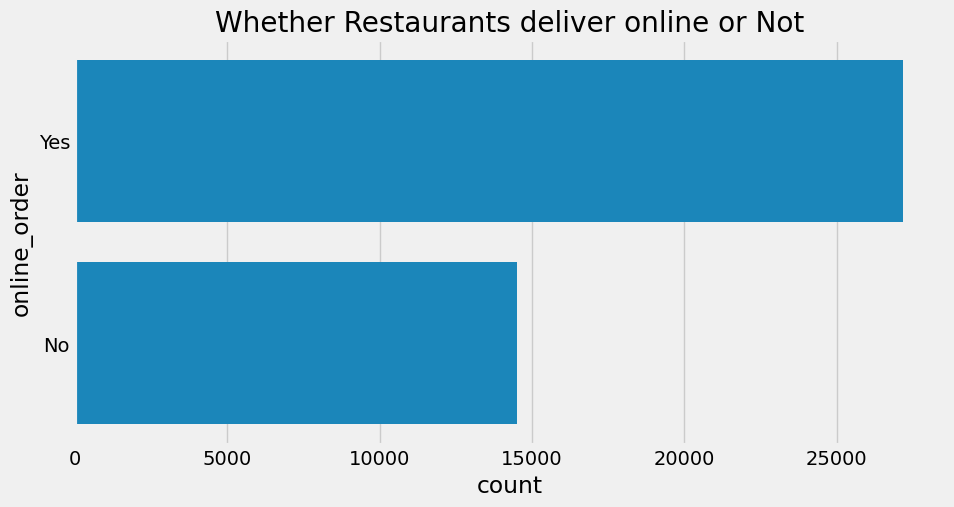

In [32]:
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

#Book table

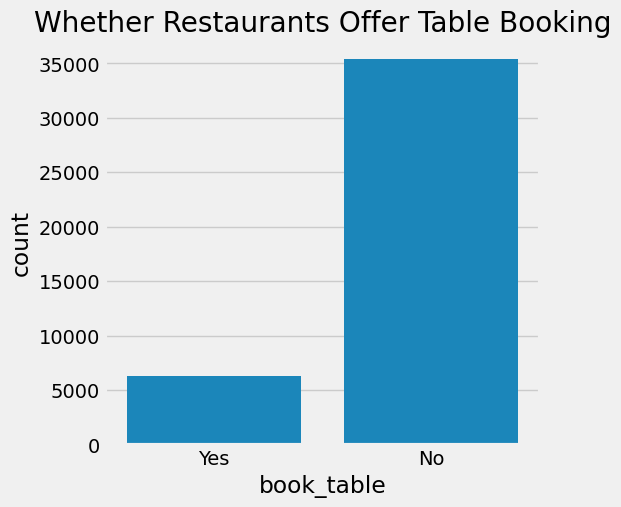

In [33]:
sns.countplot(x='book_table', data=df)
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title('Whether Restaurants Offer Table Booking')
plt.show()


#types of restaurants

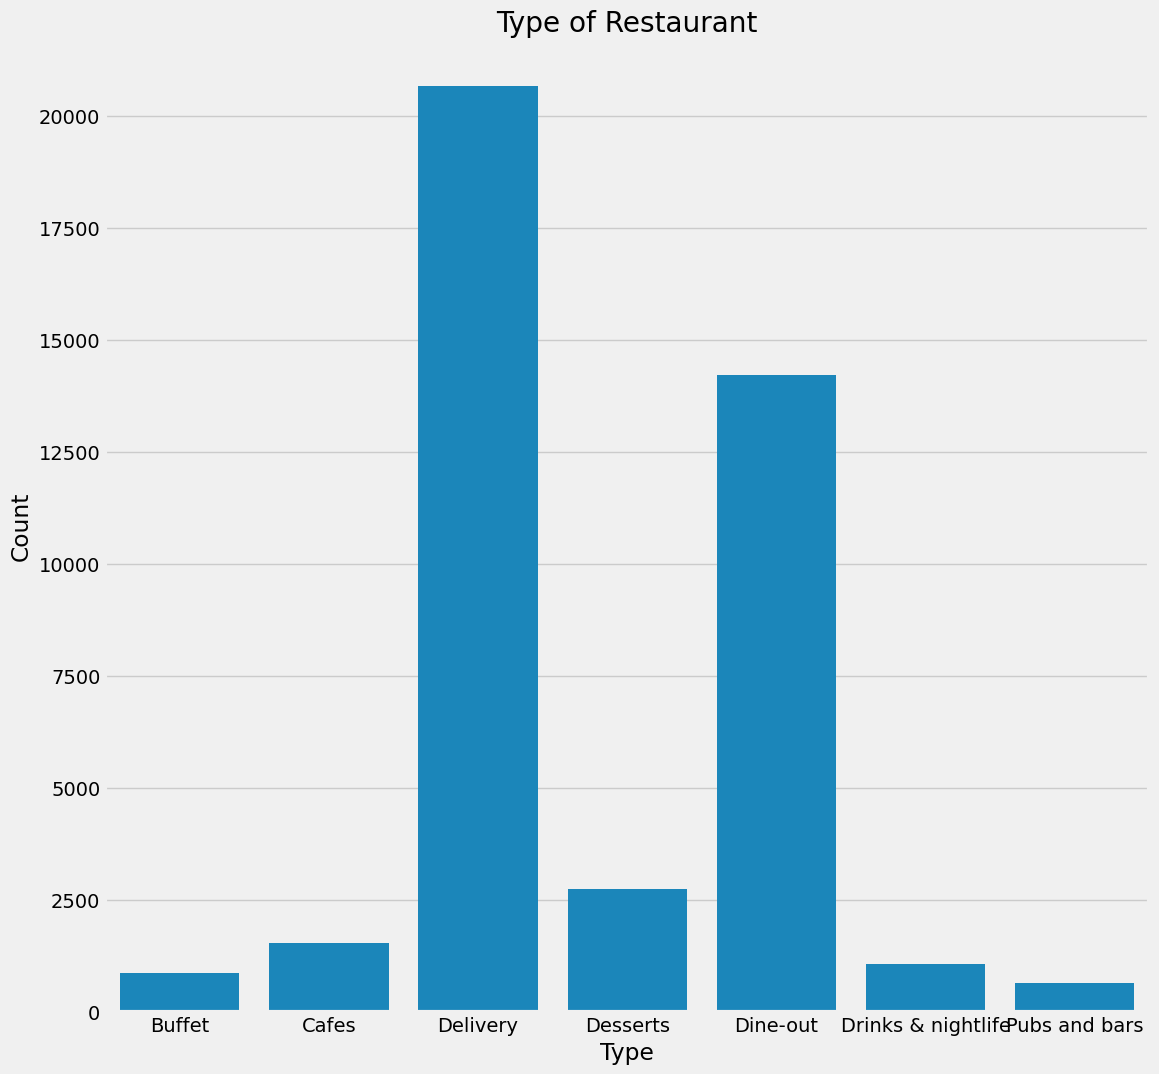

In [34]:
sns.countplot(x='type', data=df)
plt.title('Type of Restaurant')
plt.xlabel('Type')
plt.ylabel('Count')

fig = plt.gcf()
fig.set_size_inches(12, 12)

plt.show()


#most famous restaurants

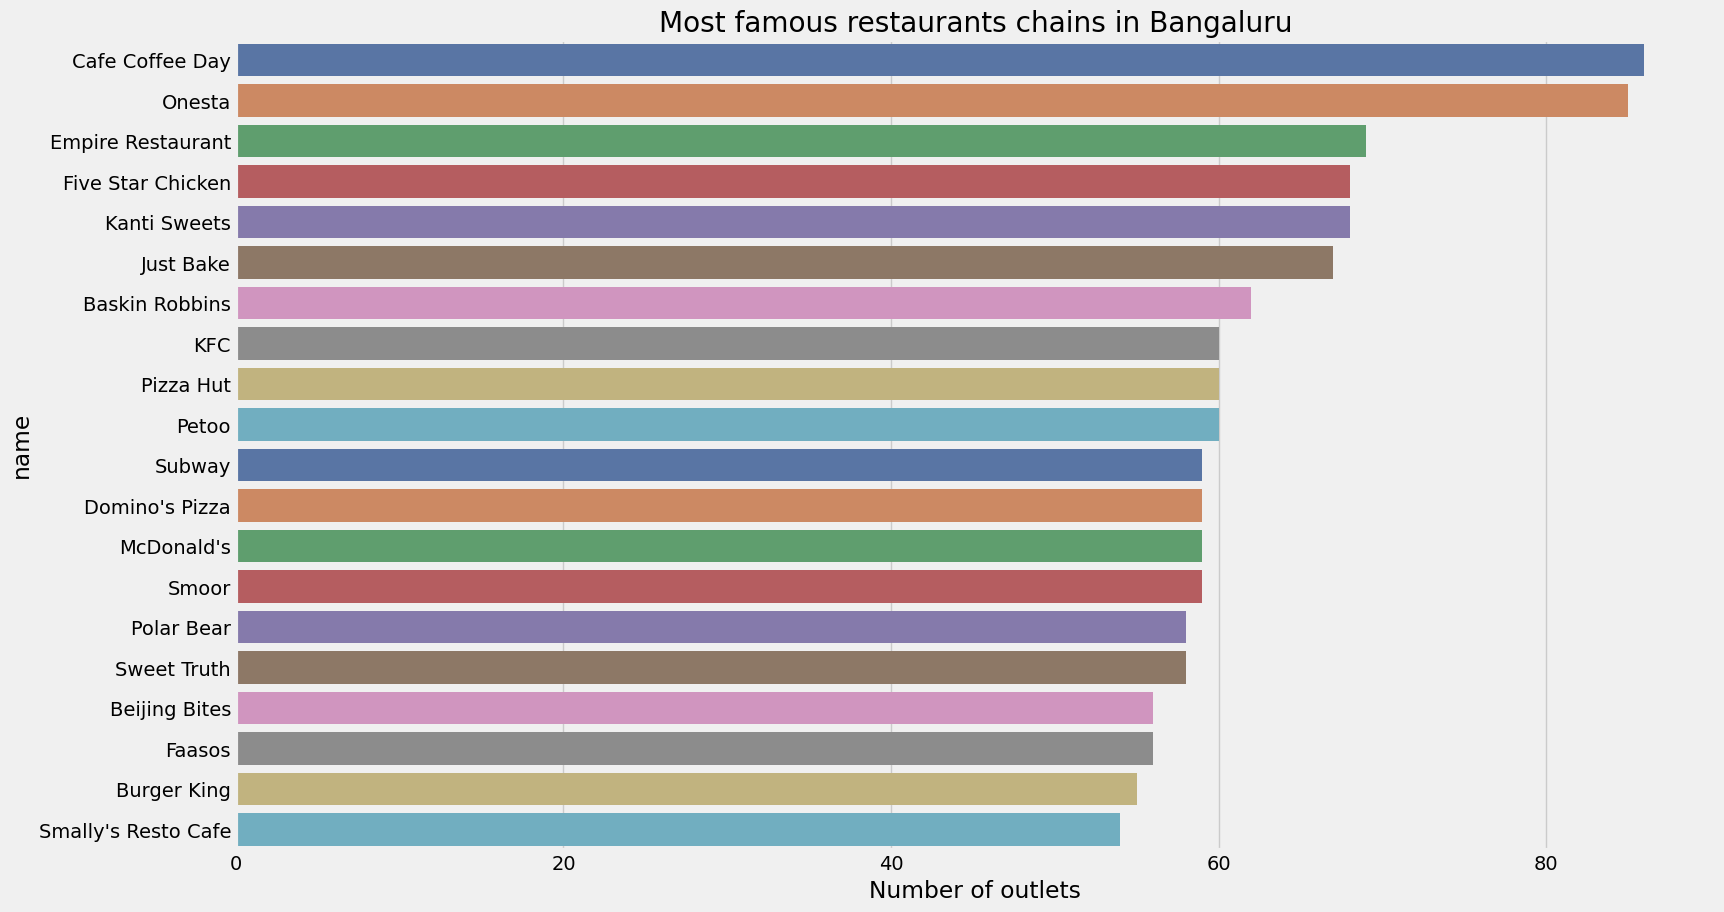

In [35]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

#rating distribution

<Figure size 1500x1500 with 0 Axes>

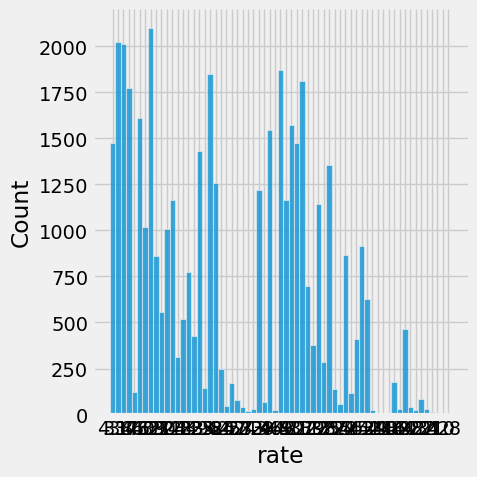

In [36]:
plt.figure(figsize=(15,15))

sns.displot(df['rate'],bins=20)

In [37]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [38]:
df = df.loc[df.rate !='-']

In [39]:
df['rate'].min()

'1.8'

In [40]:
df['rate'].max()

'4.9 '

In [41]:
df['rate']=df['rate'].astype(float)

In [42]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [43]:
((df['rate']>=2) & (df['rate']<3)).sum()

2252

In [44]:
((df['rate']>=3) & (df['rate']<4)).sum()

26989

In [45]:
(df['rate']>=4).sum()

12392

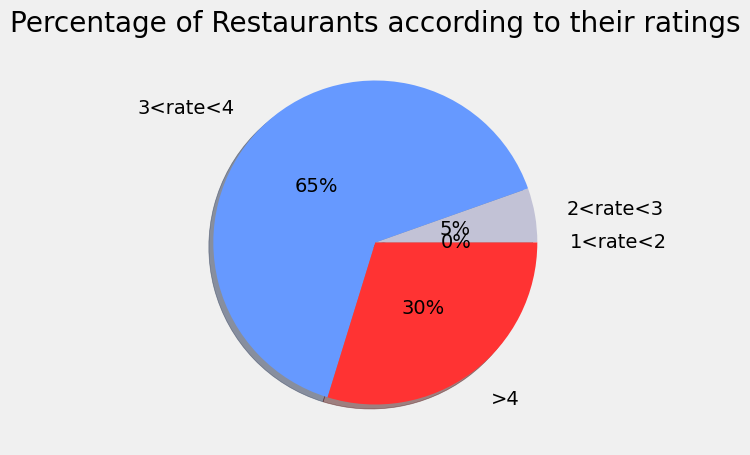

In [46]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(5,5)
plt.show()

#model construction

In [47]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#convert the online catergorical variables into numeric format

In [48]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [49]:
df.online_order.value_counts()

online_order
1    27185
0    14453
Name: count, dtype: int64

In [50]:
df.online_order = pd.to_numeric(df.online_order)

#change string catergorical into catergorical int

In [51]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

In [52]:
df.book_table = pd.to_numeric(df.book_table)

In [53]:
df.book_table.value_counts()

book_table
0    35339
1     6299
Name: count, dtype: int64

#label encode the catergorical variables to make easier in model building

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [56]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,24,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1908,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",8270,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,24,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",820,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",8270,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,19,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",657,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",8270,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,73,Masala Dosa,2236,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",8270,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,24,"Panipuri, Gol Gappe",1935,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",8270,Buffet,Banashankari


In [57]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')

In [58]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,24,1908,800.0,8270
1,1,0,787,1,24,820,800.0,8270
2,1,0,918,1,19,657,800.0,8270
3,0,0,88,1,73,2236,300.0,8270
4,0,0,166,4,24,1935,600.0,8270


In [59]:
x.describe()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
count,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000,41638.000000
mean,0.652889,0.151280,351.731976,35.702988,45.394904,1217.702243,599.701138,7179.659566
std,0.476057,0.358326,882.038370,26.385884,26.161125,675.181753,465.255811,2196.481682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,21.000000,12.000000,24.000000,594.000000,300.000000,7865.250000
50%,1.000000,0.000000,73.000000,31.000000,37.000000,1264.000000,500.000000,8270.000000
75%,1.000000,0.000000,276.000000,54.000000,73.000000,1712.000000,700.000000,8270.000000
max,1.000000,1.000000,16832.000000,91.000000,87.000000,2383.000000,6000.000000,8270.000000


#heatmap

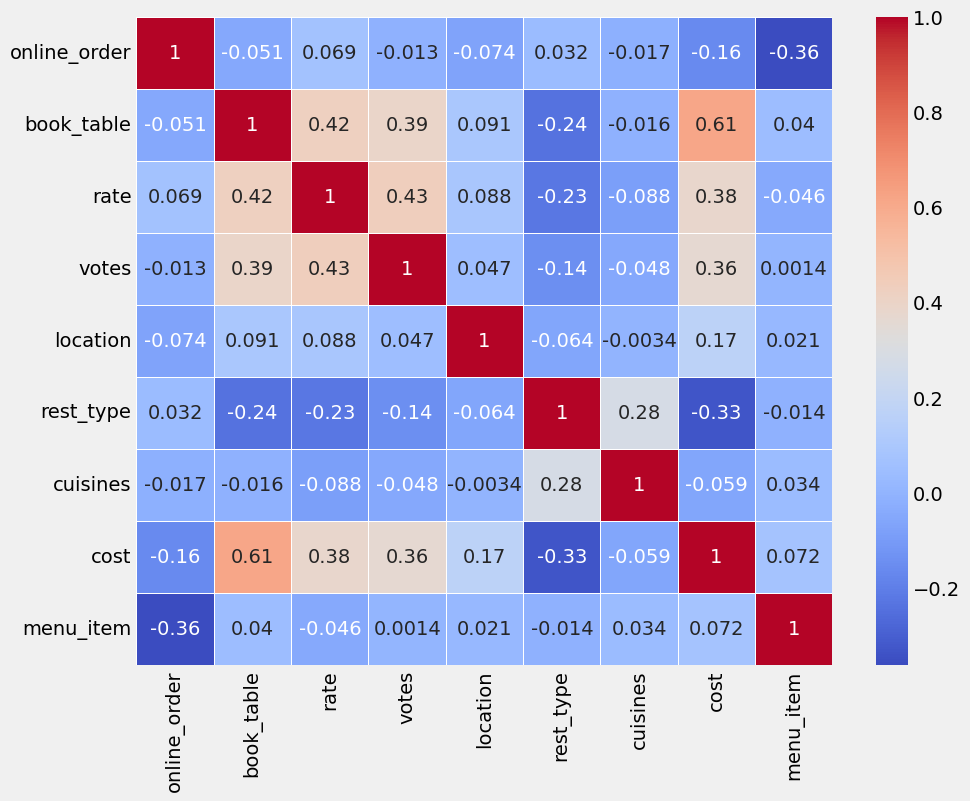

In [60]:
# Select numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include='number').columns
features_for_heatmap = numeric_cols

# Create a correlation matrix
correlation_matrix =df[features_for_heatmap].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()


In [61]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 41638, dtype: float64

#spliting the dataset

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)
print("X_train:")
print(x_train.head(5))
print("\nX_test:")
print(x_test.head(5))

X_train:
       online_order  book_table  votes  location  rest_type  cuisines   cost  \
41222             1           0     14        55         73      2164  200.0   
37134             1           0     94        40         24      1741  600.0   
11814             1           0     21        27         36      2237  500.0   
38393             0           0     53        12         73      2253  250.0   
37150             1           0     27         0         73       782  300.0   

       menu_item  
41222        111  
37134       2082  
11814        452  
38393       8270  
37150       4635  

X_test:
       online_order  book_table  votes  location  rest_type  cuisines   cost  \
21059             1           0   4912        31         24      1929  750.0   
42822             1           0      6        78         17       500  400.0   
46572             1           0     13        54         73      1489  400.0   
4302              1           0    500        75         16       5

In [63]:
x_train.shape
x_test.shape


(12492, 8)

In [64]:
print("y_train:")
print(y_train.head(5))
print("\ny_test:")
print(y_test.head(5))

y_train:
41222    3.5
37134    3.8
11814    3.4
38393    3.0
37150    3.7
Name: rate, dtype: float64

y_test:
21059    4.4
42822    3.2
46572    3.8
4302     4.2
38086    3.3
Name: rate, dtype: float64


#Linear regression

In [65]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
residuals = y_test - y_pred
mae = abs(residuals).mean()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)


Absolute Error:  0.2837912418841751
Mean Squared Error:  0.1353787016347734
R2 Score:  0.2961842642155774


#random-forest regression

In [66]:
RF_Model = RandomForestRegressor(n_estimators=650, random_state=245, min_samples_leaf=0.0001)
RF_Model.fit(x_train, y_train)
y_predict = RF_Model.predict(x_test)
mae = abs(y_test - y_predict).mean()
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Absolute Error:  0.08836546776561151
Mean Squared Error:  0.025179397284146088
R2 Score:  0.869095686306999


#SVM REGRESSOR

In [67]:
# Import necessary libraries
from sklearn.svm import SVR

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

# Initialize the Support Vector Machine (SVM) model with a regression kernel
svm_model = SVR()

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Calculate metrics
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

# Display the results
print(f"Absolute Error: {absolute_error}")
print(f"Mean Squared Error: {mean_squared_error_val}")
print(f"R2 Score: {r2_score_val}")


Absolute Error: 0.2619219009447619
Mean Squared Error: 0.12517087256406106
R2 Score: 0.3570946057718739


#KNN REGRESSOR

In [68]:

from sklearn.neighbors import KNeighborsRegressor

# create KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# fit the model to the training data
knn_reg.fit(x_train, y_train)

# make predictions
y_pred = knn_reg.predict(x_test)

# calculate and print the absolute error
abs_error = mean_absolute_error(y_test, y_pred)
print("Absolute error: ", abs_error)

# calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

# calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Absolute error:  0.1606131924431636
Mean squared error:  0.0666359590137688
R2 score:  0.6577429187641803


#Ridge Regressior
 

In [69]:
# Import necessary libraries

from sklearn.linear_model import Ridge


# Create and fit the Ridge Regression model
alpha = 1.0  # Regularization strength
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = ridge_regressor.predict(x_test)

# Calculate R2 score, absolute error, and mean squared error
r2 = r2_score(y_test, y_pred)
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)

# Print the results
print(f'Absolute Error: {absolute_error:}')
print(f'Mean Squared Error: {mean_squared_error_val:}')
print(f'R2 Score: {r2:}')

Absolute Error: 0.287005894566154
Mean Squared Error: 0.13823162625022217
R2 Score: 0.2900116748510204


#Lasso regressor

In [70]:
# Import necessary libraries
from sklearn.linear_model import Lasso
# Create and fit the Lasso Regression model
alpha = 1.0  # Regularization strength
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lasso_regressor.predict(x_test)

# Calculate R2 score, absolute error, and mean squared error
r2 = r2_score(y_test, y_pred)
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)

# Print the results
print(f'Absolute Error: {absolute_error:}')
print(f'Mean Squared Error: {mean_squared_error_val:}')
print(f'R2 Score: {r2:}')

Absolute Error: 0.2950890492160142
Mean Squared Error: 0.14609838104272024
R2 Score: 0.24960627551517622


#elastic net regressor

In [71]:

from sklearn.linear_model import ElasticNet
alpha = 1.0  # Regularization strength
l1_ratio = 0.5  # Mix ratio between L1 and L2 regularization
elastic_net_regressor = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = elastic_net_regressor.predict(x_test)

# Calculate R2 score, absolute error, and mean squared error
r2 = r2_score(y_test, y_pred)
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)

# Print the results
print(f'Absolute Error: {absolute_error:}')
print(f'Mean Squared Error: {mean_squared_error_val:}')
print(f'R2 Score: {r2:}')


Absolute Error: 0.29337396085366085
Mean Squared Error: 0.14503475981873545
R2 Score: 0.2550692702863069


#Bayesian Regressor

In [72]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(x_train, y_train.ravel())  # The ravel() method is used to convert y_train to a 1D array

# Make predictions on the test set
y_pred = bayesian_regressor.predict(x_test)

# Calculate R2 score, absolute error, and mean squared error
r2 = r2_score(y_test, y_pred)
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)

# Print the results
print(f'R2 Score: {r2:}')
print(f'Absolute Error: {absolute_error:}')
print(f'Mean Squared Error: {mean_squared_error_val:}')


R2 Score: 0.29005695706404644
Absolute Error: 0.2869737938021616
Mean Squared Error: 0.1382228100011022


#EXTRA TREE REGRESSION

In [73]:
model = ExtraTreesRegressor()
x=model
extra=x

# Train the model
x.fit(x_train, y_train)

# Make predictions on the test set
predictions = x.predict(x_test)

# calculate and print the absolute error
abs_error = mean_absolute_error(y_test,predictions)
print("Absolute error: ", abs_error)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# calculate and print the R-squared score
r2 = r2_score(y_test, predictions)
print("R2 score: ", r2)
print(x)

Absolute error:  0.03948281238943159
Mean Squared Error: 0.01298498557426095
R2 score:  0.9333062309252954
ExtraTreesRegressor()


#bargraph

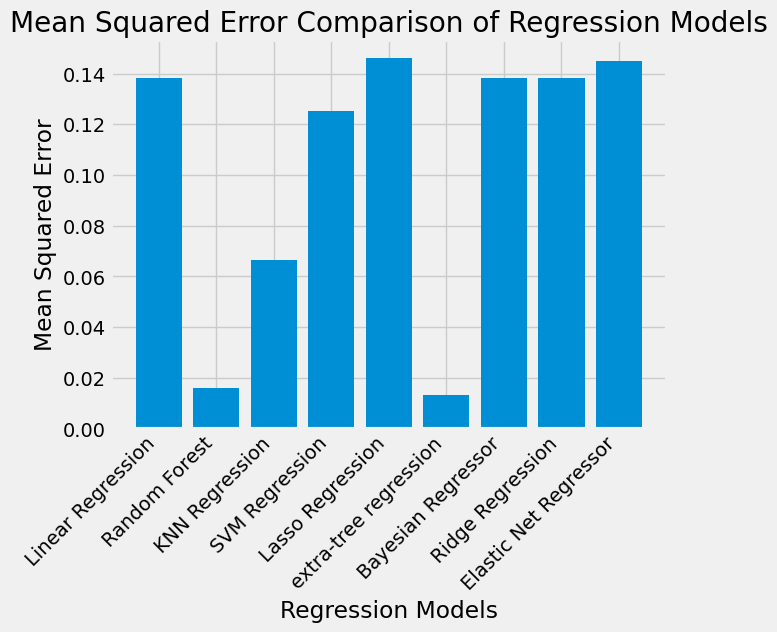

In [74]:
# Initialize regression modelsa
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'SVM Regression': SVR(),
    'Lasso Regression': Lasso(),
    'extra-tree regression' : ExtraTreesRegressor(),
    'Bayesian Regressor': BayesianRidge(),
    'Ridge Regression': Ridge(),
    'Elastic Net Regressor': ElasticNet()
}

# Train and evaluate each model
mse_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse

# Plot the MSE scores in a bar graph
plt.bar(mse_scores.keys(), mse_scores.values())
plt.title('Mean Squared Error Comparison of Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45, ha='right')
plt.show()


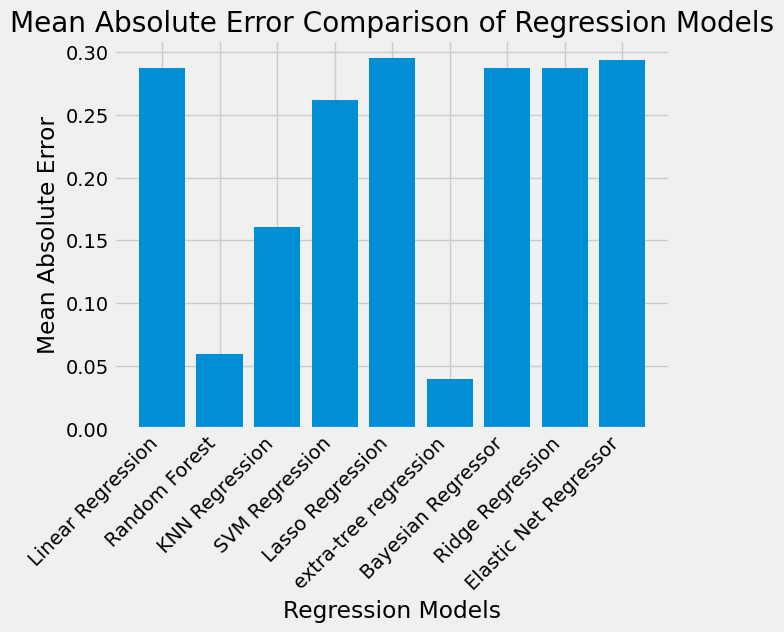

In [75]:
# Train and evaluate each model
absolute_error_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    absolute_error = mean_absolute_error(y_test, y_pred)
    absolute_error_scores[model_name] = absolute_error

# Plot the Absolute Error scores in a bar graph
plt.bar(absolute_error_scores.keys(), absolute_error_scores.values())
plt.title('Mean Absolute Error Comparison of Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45, ha='right')
plt.show()


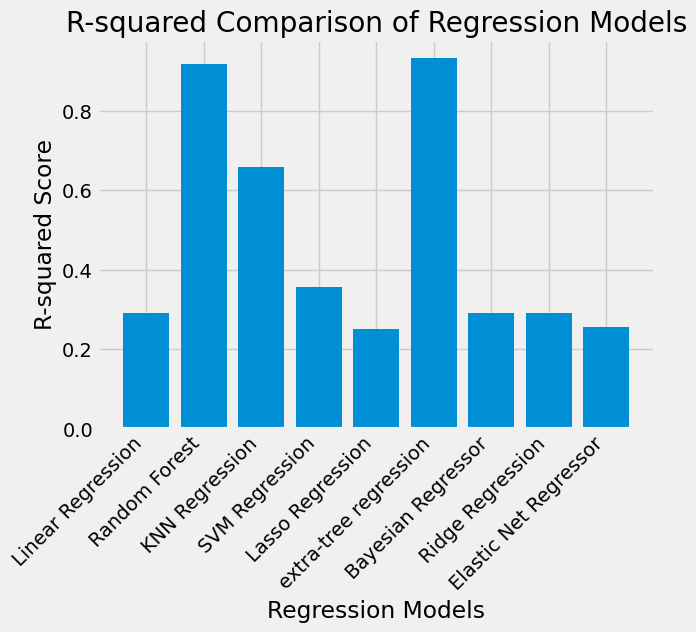

In [76]:
# Train and evaluate each model
r2_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[model_name] = r2

# Plot the R-squared scores in a bar graph
plt.bar(r2_scores.keys(), r2_scores.values())
plt.title('R-squared Comparison of Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.show()


#model saving

In [ ]:
import joblib
joblib.dump(extra,'mymodel.pkl')


['mymodel.pkl']